In [12]:
# IT_MEMBER2: Encoding Categorical Variables
# Technique: LabelEncoder for Target, OneHotEncoder for Gender/Marital status
# Justification: Categorical features like 'Gender' and 'Target' need encoding for ML; this prevents ordinal misinterpretation and enables accurate dropout classification.

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

In [13]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
# Define paths and create directories
data_path = '/content/drive/MyDrive/rawDataset.csv'
results_path = '/content/drive/MyDrive/results/'
eda_vis_path = results_path + 'eda_visualizations/'
os.makedirs(eda_vis_path, exist_ok=True)

In [15]:
# Load dataset
columns = ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance',
           'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification",
           "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced',
           'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
           'Age at enrollment', 'International', 'Curricular units 1st sem (credited)',
           'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)',
           'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)',
           'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
           'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
           'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)',
           'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']
df = pd.read_csv(data_path, sep=';', names=columns, header=0)

In [16]:
# Encoding
le = LabelEncoder()
df['Target_encoded'] = le.fit_transform(df['Target'])
print("Target Encoding:", dict(zip(le.classes_, le.transform(le.classes_))))

ohe = OneHotEncoder(sparse_output=False, drop='first')  # Avoid dummy trap
ohe_cols = ['Gender', 'Marital status']
ohe_encoded = pd.DataFrame(ohe.fit_transform(df[ohe_cols]), columns=ohe.get_feature_names_out(ohe_cols))
df = pd.concat([df.drop(ohe_cols, axis=1), ohe_encoded], axis=1)

print("Sample after Encoding:\n", df[['Target', 'Target_encoded'] + list(ohe_encoded.columns)].head())

Target Encoding: {'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}
Sample after Encoding:
      Target  Target_encoded  Gender_1  Marital status_2  Marital status_3  \
0   Dropout               0       1.0               0.0               0.0   
1  Graduate               2       1.0               0.0               0.0   
2   Dropout               0       1.0               0.0               0.0   
3  Graduate               2       0.0               0.0               0.0   
4  Graduate               2       0.0               1.0               0.0   

   Marital status_4  Marital status_5  Marital status_6  
0               0.0               0.0               0.0  
1               0.0               0.0               0.0  
2               0.0               0.0               0.0  
3               0.0               0.0               0.0  
4               0.0               0.0               0.0  


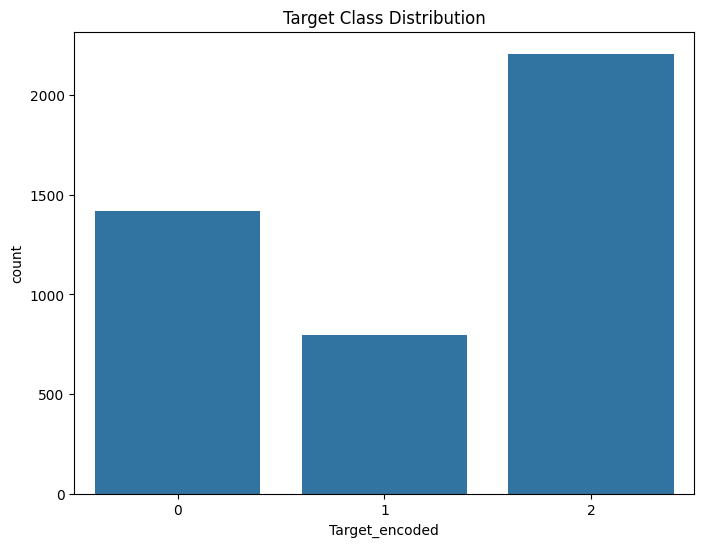

In [17]:
# EDA Visualization: Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='Target_encoded', data=df)
plt.title("Target Class Distribution")
plt.savefig(eda_vis_path + 'member2_target_countplot.png')
plt.show()

Interpretation - From the countplot we can see that the categories are uneven. For example, the number of graduates is much higher than the number of dropouts. Because of this imbalance, the model might focus more on the larger group and ignore the smaller one. To fix this, we may later use methods like oversampling so the model can learn about dropouts more effectively.